In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Models

from lightgbm import LGBMRegressor, LGBMClassifier
import lightgbm as lgb
import xgboost as XGB
from sklearn.cluster import KMeans
import tqdm

# Misc lib
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from functools import partial
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from IPython.display import Image

from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import average_precision_score, classification_report, precision_recall_curve, precision_score, recall_score,roc_auc_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss

# Importa os pacotes de algoritmos
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Importa pacotes do sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.preprocessing import scale, MinMaxScaler, StandardScaler

# Utils
import math, string, os
import datetime

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

/Users/Daniela/anaconda3/envs/general/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train = pd.read_csv('dataset_treino.csv')
test = pd.read_csv('dataset_teste.csv')
id_test = test.ID

In [3]:
def check_missing(dataset, display = 5):
    temp_df = dataset.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Great! There are no missing values in this dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)

def scale_and_normalize(X, scaler_x, exception_list= None, y= None, scaler_y= None, transform_y = False, train_or_test = 'train'):
    '''
    scaler_x = StandardScaler()
    scaler_y = StandardScaler()

    rscaler_x = RobustScaler()
    rscaler_y = RobustScaler()

    jtrans_x = PowerTransformer(method='yeo-johnson')
    jtrans_y = PowerTransformer(method='yeo-johnson')

    boxcox_x = PowerTransformer(method='box-cox')
    boxcox_y = PowerTransformer(method='box-cox')

    qt_x = QuantileTransformer(output_distribution='normal')
    qt_y = QuantileTransformer(output_distribution='normal')
    '''
    
    temp_X = X.copy()
    scaled_y = y.copy()
    
    # Select features that will be transformed
    select = [c for c in temp_X.columns if c not in exception_list]
    temp_X_partial = temp_X[select]
    
    if train_or_test == 'train':
        # Fit and Transform in X - Train
        df_normalized = pd.DataFrame(scaler_x.fit_transform(temp_X_partial))
        df_normalized.columns = select
        temp_X[select] = df_normalized
        print('Fit and transform X - train done')
    
        if (y is not None) and (transform_y == True):
            # Fit and Transform in Y - Train
            scaled_y = pd.DataFrame(scaler_y.fit_transform(np.array(y).reshape(-1, 1)))
            print('Fit and transform y - train done')
    
    if (train_or_test == 'test') or (train_or_test == 'val') :
        # Transform X - Test
        df_normalized = pd.DataFrame(scaler_x.transform(temp_X_partial))
        df_normalized.columns = select
        temp_X[select] = df_normalized
        print('Transform X - test done')
    
        if (y is not None) and (transform_y == True):
            # Transform Y - Test
            scaled_y = pd.DataFrame(scaler_y.transform(np.array(y).reshape(-1, 1)))
            print('Transform y - test done')
    
    return temp_X, scaled_y, scaler_x, scaler_y
    
    

In [4]:
missing_above_40 = check_missing(train,135)
missing_above_40_idx = missing_above_40[missing_above_40['% Missing']>40].index ; missing_above_40_idx

Index(['v30', 'v113', 'v102', 'v85', 'v119', 'v51', 'v123', 'v23', 'v69',
       'v78', 'v16', 'v131', 'v115', 'v9', 'v80', 'v122', 'v95', 'v92', 'v118',
       'v19', 'v130', 'v37', 'v97', 'v121', 'v65', 'v20', 'v68', 'v90', 'v39',
       'v53', 'v58', 'v120', 'v100', 'v116', 'v11', 'v15', 'v73', 'v43', 'v55',
       'v13', 'v93', 'v57', 'v94', 'v6', 'v60', 'v86', 'v84', 'v127', 'v126',
       'v67', 'v18', 'v83', 'v88', 'v49', 'v96', 'v111', 'v26', 'v27', 'v28',
       'v29', 'v7', 'v32', 'v33', 'v35', 'v1', 'v104', 'v41', 'v42', 'v103',
       'v45', 'v99', 'v77', 'v106', 'v76', 'v101', 'v4', 'v17', 'v59', 'v61',
       'v44', 'v48', 'v64', 'v2', 'v87', 'v105', 'v98', 'v70', 'v36', 'v109',
       'v108', 'v81', 'v117', 'v5', 'v128', 'v82', 'v25', 'v124', 'v46', 'v89',
       'v8', 'v54', 'v63'],
      dtype='object')

In [5]:
drop_list =['v8','v23','v25','v31','v36','v37','v46','v51','v53','v54','v63','v73','v75','v79','v81','v82','v89','v92','v95','v105','v107','v108','v109','v110','v116','v117','v118','v119','v123','v124','v128']
maintain = ['ID', 'target','v3','v10','v12','v14','v21','v22','v24','v30','v31','v34','v38','v40','v47','v50','v52','v56','v62','v66','v71','v72','v74','v75','v79','v91','v107','v110','v112','v113','v114','v125','v129']
features = [x for x in train.columns if x in maintain]

In [6]:
train.drop(drop_list, axis = 1, inplace = True)
test.drop(drop_list, axis = 1, inplace = True)

In [7]:
check_missing(train,135)

,Missing n,% Missing
v30,60110,52.580016
v113,55304,48.376064
v102,51316,44.887641
v85,50682,44.333062
v131,49895,43.644650
v16,49895,43.644650
v69,49895,43.644650
v78,49895,43.644650
v115,49895,43.644650
v80,49851,43.606162


In [8]:
categorical_features = [x for x in train.columns if x in train.select_dtypes('object')]

le = LabelEncoder()

for col in categorical_features:
    train[col].fillna(train[col].mode()[0], inplace= True)
    test[col].fillna(train[col].mode()[0], inplace= True)
    #print(col,': ', np.unique(list(train[col].values) + list(test[col].values)))
    le.fit(np.unique(list(train[col].values) + list(test[col].values)))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])
print(train.shape)
train.head()

(114321, 102)


,ID,target,v1,v2,v3,v4,v5,v6,v7,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v26,v27,v28,v29,v30,v32,v33,v34,v35,v38,v39,v40,v41,v42,v43,v44,v45,v47,v48,v49,v50,v52,v55,v56,v57,v58,v59,v60,v61,v62,v64,v65,v66,v67,v68,v69,v70,v71,v72,v74,v76,v77,v78,v80,v83,v84,v85,v86,v87,v88,v90,v91,v93,v94,v96,v97,v98,v99,v100,v101,v102,v103,v104,v106,v111,v112,v113,v114,v115,v120,v121,v122,v125,v126,v127,v129,v130,v131
0,3,1,1.335739,8.727474,2,3.921026,7.915266,2.599278,3.176895,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,21416,2,1.720818,3.393503,0.590122,8.880867,2,1.083033,1.010829,7.270147,8.375452,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,2,12.171733,8.086643,0.899420,6,1.299638,90,3.971118,0.529802,10.890984,1.588448,15.858152,1,6.363189,18.303925,2,9.314079,15.231789,17.142857,11.784549,5,1,1,2.230940,7.292418,8.571429,3.000000,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.905342,0,5.814018,3.517720,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,12.579184,0.433213,14,17,15.634907,2.857144,1.059603,0.803572,8.000000,21,1.804126,3.113719,0,0.636365,2.857144
1,4,1,NaN,NaN,2,NaN,9.191265,NaN,NaN,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,9923,2,NaN,NaN,NaN,NaN,2,NaN,NaN,3.615077,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1.379210,6,NaN,106,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,0,NaN,NaN,NaN,12.053353,5,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.848004,NaN,NaN,1,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,17,10.308044,NaN,NaN,NaN,NaN,6,NaN,NaN,0,NaN,NaN
2,5,1,0.943877,5.310079,2,4.410969,5.326159,3.979592,3.928571,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,9090,4,2.244897,5.306122,0.836005,7.499999,2,1.454082,1.734693,4.043864,7.959184,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,2,12.711328,6.836734,0.604504,5,0.765305,19,4.030613,4.277456,9.105481,2.151361,16.075602,1,5.517949,16.377205,0,8.367347,11.040463,5.882353,8.460654,1,3,1,1.963971,5.918368,11.764705,3.333334,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.811447,6,5.156559,4.214944,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,11.670572,3.367348,18,17,11.205561,12.941177,2.138728,2.238806,9.333333,5,1.773709,3.922193,2,0.883118,1.176472
3,6,1,0.797415,8.304757,2,4.225930,11.627438,2.097700,1.987549,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,1953,3,1.308269,2.303640,8.926662,8.874521,2,1.587644,1.666667,8.703550,8.898468,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,2,12.194855,8.591954,3.329176,7,1.178161,50,3.965517,1.732102,11.777912,1.229246,15.927390,1,6.292979,17.011645,0,9.703065,18.568129,9.425288,13.594728,5,2,1,2.188198,8.213602,13.448277,1.947261,1.681034,1.379310,1.587045,1.242817,10.747144,1.408046,1.042425,1,5.498902,3.423944,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,12.554274,2.643678,9,17,13.777666,10.574713,1.166281,1.956521,7.018256,64,1.415230,2.954381,1,1.677108,1.034483
4,8,1,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,6.320087,NaN,10.991098,NaN,NaN,NaN,NaN,NaN,NaN,6.414567,10300,4,NaN,NaN,NaN,NaN,2,NaN,NaN,6.083151,NaN,0,NaN,10.138920,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,1.364536,7,NaN,50,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,NaN,NaN,NaN,NaN,5,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,17,14.097099,NaN,NaN,NaN,NaN,89,NaN,NaN,0,NaN,NaN


In [ ]:
correlation = train.corr()

In [ ]:
corr_target = correlation.sort_values(by='target', ascending=True)
corr_target = pd.DataFrame(corr_target.ix[:,1]) ; corr_target[(corr_target['target']>0.1)|(corr_target['target']<-0.1)]

In [ ]:
# Calculates the correlation and plot the data in s heatmap
sns.set(rc={'figure.figsize':(30, 30)})
sns.heatmap(correlation, annot=True, cmap='viridis',linewidths=0.2,annot_kws={'size':15},fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('corr_heatmap.png')
plt.show()

In [ ]:
# Drop highly correlated features
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

drop_columns = train.columns[columns == False].values
print(drop_columns)

In [ ]:
drop_list = ['v12','v75','v114']
train.drop(drop_list, axis = 1, inplace = True)
test.drop(drop_list, axis = 1, inplace = True)

In [9]:
def fillna(train, test):
    for col in train.columns:
        if col not in ['target']:
            if test[col].dtypes!='object':
                test[col].fillna(-999, inplace= True)
                train[col].fillna(-999, inplace= True)

In [10]:
fillna(train, test)

In [11]:
check_missing(train,20)

Great! There are no missing values in this dataset.


In [12]:
features = [col for col in train.columns if col not in ['target', 'ID']]
X = train[features]
y = train['target']
print(X.shape)

(114321, 100)


In [13]:
X_test = test[features]

In [14]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v26,v27,v28,v29,v30,v32,v33,v34,v35,v38,v39,v40,v41,v42,v43,v44,v45,v47,v48,v49,v50,v52,v55,v56,v57,v58,v59,v60,v61,v62,v64,v65,v66,v67,v68,v69,v70,v71,v72,v74,v76,v77,v78,v80,v83,v84,v85,v86,v87,v88,v90,v91,v93,v94,v96,v97,v98,v99,v100,v101,v102,v103,v104,v106,v111,v112,v113,v114,v115,v120,v121,v122,v125,v126,v127,v129,v130,v131
0,1.335739,8.727474,2,3.921026,7.915266,2.599278,3.176895,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,21416,2,1.720818,3.393503,0.590122,8.880867,2,1.083033,1.010829,7.270147,8.375452,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,2,12.171733,8.086643,0.899420,6,1.299638,90,3.971118,0.529802,10.890984,1.588448,15.858152,1,6.363189,18.303925,2,9.314079,15.231789,17.142857,11.784549,5,1,1,2.230940,7.292418,8.571429,3.000000,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.905342,0,5.814018,3.517720,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,12.579184,0.433213,14,17,15.634907,2.857144,1.059603,0.803572,8.000000,21,1.804126,3.113719,0,0.636365,2.857144
1,-999.000000,-999.000000,2,-999.000000,9.191265,-999.000000,-999.000000,-999.000000,1.312910,-999.000000,6.507647,-999.000000,11.636386,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,6.763110,9923,2,-999.000000,-999.000000,-999.000000,-999.000000,2,-999.000000,-999.000000,3.615077,-999.000000,0,-999.000000,14.305766,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,4,-999.000000,-999.000000,1.379210,6,-999.000000,106,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,2,-999.000000,-999.000000,0,-999.000000,-999.000000,-999.000000,12.053353,5,2,1,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,9.848004,-999.000000,-999.000000,1,-999.000000,-999.000000,-999.000000,-999.000000,8.303967,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,20,17,10.308044,-999.000000,-999.000000,-999.000000,-999.000000,6,-999.000000,-999.000000,0,-999.000000,-999.000000
2,0.943877,5.310079,2,4.410969,5.326159,3.979592,3.928571,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,9090,4,2.244897,5.306122,0.836005,7.499999,2,1.454082,1.734693,4.043864,7.959184,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,2,12.711328,6.836734,0.604504,5,0.765305,19,4.030613,4.277456,9.105481,2.151361,16.075602,1,5.517949,16.377205,0,8.367347,11.040463,5.882353,8.460654,1,3,1,1.963971,5.918368,11.764705,3.333334,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.811447,6,5.156559,4.214944,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,11.670572,3.367348,18,17,11.205561,12.941177,2.138728,2.238806,9.333333,5,1.773709,3.922193,2,0.883118,1.176472
3,0.797415,8.304757,2,4.225930,11.627438,2.097700,1.987549,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,1953,3,1.308269,2.303640,8.926662,8.874521,2,1.587644,1.666667,8.703550,8.898468,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,2,12.194855,8.591954,3.329176,7,1.178161,50,3.965517,1.732102,11.777912,1.229246,15.927390,1,6.292979,17.011645,0,9.703065,18.568129,9.425288,13.594728,5,2,1,2.188198,8.213602,13.448277,1.947261,1.681034,1.379310,1.587045,1.242817,10.747144,1.408046,1.042425,1,5.498902,3.423944,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,12.554274,2.643678,9,17,13.777666,10.574713,1.166281,1.956521,7.018256,64,1.415230,2.954381,1,1.677108,1.034483
4,-999.000000,-999.000000,2,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,1.050328,-999.000000,6.320087,-999.000000,10.991098,-999.000000,-999.000000,-999.000000,-999.000000,-999.

In [15]:
#exception_lst = categorical_features #[x for x in X.columns if x not in ['target','ID']]
exception_lst = ['target','ID']

scaler_x = StandardScaler()

X_scaled, _, scaler_x, _ = scale_and_normalize(X, scaler_x= scaler_x, exception_list= exception_lst, 
                                               y= y, scaler_y= None, transform_y = False, train_or_test = 'train')

Fit and transform X - train done


In [16]:
#exception_lst = categorical_features #[x for x in X.columns if x not in ['target','ID']]
exception_lst = ['target','ID']

X_test_scaled, _, _, _ = scale_and_normalize(X_test, scaler_x= scaler_x, exception_list= exception_lst, 
                                               y= y, scaler_y= None, transform_y = False, train_or_test = 'test')

Transform X - test done


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
v1,114321.0,-5.755396e-17,1.000004,-1.137596,-1.137596,0.876831,0.878981,0.916065
v2,114321.0,8.779154e-17,1.000004,-1.138315,-1.138315,0.871637,0.878649,0.903593
v3,114321.0,9.340398e-16,1.000004,-21.790936,0.048427,0.048427,0.048427,0.048427
v4,114321.0,4.941187e-17,1.000004,-1.138325,-1.138325,0.875687,0.878874,0.910357
v5,114321.0,-3.185357e-17,1.000004,-1.162373,-1.162373,0.856211,0.860667,0.882897
v6,114321.0,2.646487e-16,1.000004,-1.137597,-1.137597,0.877714,0.879142,0.914414
v7,114321.0,1.199559e-17,1.000004,-1.137597,-1.137597,0.877705,0.879135,0.914316
v9,114321.0,9.074382e-18,1.000004,-1.137208,-1.137208,0.874877,0.879880,0.901280
v10,114321.0,7.644856e-18,1.000004,-36.829113,-0.003583,0.006086,0.035094,0.640227
v11,114321.0,-2.451948e-16,1.000004,-1.137516,-1.137516,0.877343,0.879399,0.888158


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, classification_report, precision_recall_curve, precision_score, recall_score,roc_auc_score 



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state= 4242, stratify=y)

In [20]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
fit_params={#"early_stopping_rounds":100, 
            "eval_metric" : ['log_loss'], 
            #"eval_set" : [(X_test,y_test)],
            #'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}
            

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
n_iterations = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

clf = lgb.LGBMClassifier(max_depth=-1, 
                         random_state=42, 
                         silent=True, 
                         metric='neg_log_loss', 
                         n_jobs=4, 
                         n_estimators=1000)

gs = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=param_test, 
    n_iter=n_iterations,
    scoring='neg_log_loss',
    cv=2,
    refit=True,
    random_state=42,
    verbose=True)

gs.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [ ]:
opt_parameters = {'colsample_bytree': 0.40918272417423085, 'min_child_samples': 246, 'min_child_weight': 1e-05, 'num_leaves': 10, 'reg_alpha': 2, 'reg_lambda': 100, 'subsample': 0.2564549979203439} 

clf_sw = lgb.LGBMClassifier(**clf.get_params())

#set optimal parameters
clf_sw.set_params(**opt_parameters)

In [ ]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='neg_log_loss',
                                cv=5,
                                refit=True,
                                verbose=True)

In [ ]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

In [ ]:
gs_sample_weight.best_params_

In [21]:
%%time
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedKFold
import time

X_train = X_scaled
y_train = y

param = {
    'boosting_type':'gbdt',
    'learning_rate' : 0.1, 
    'n_estimators' : 1000, 
    'max_depth' : -1,
    'min_child_samples':246,
    'min_child_weight' : 1e-5,
    'gamma' : 0.04, 
    'subsample' : 0.25,
    #'subsample_for_bin':200000,
    'colsample_bytree' : 0.4,
    'reg_alpha' : 2,
    'num_leaves':10,
    'reg_lambda':100,
    'objective' : 'binary', 
    'n_jobs' : 4,
    'scale_pos_weight' : 1, 
    'seed' : 42
}


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_test_scaled))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(kfold.split(X_train,y_train)):


    print("fold {}".format(fold_ + 1))
    trn_data = lgb.Dataset(X_train.iloc[trn_idx],
                           label=y_train.iloc[trn_idx]
                          )
    val_data = lgb.Dataset(X_train.iloc[val_idx],
                           label=y_train.iloc[val_idx]
                          )

    num_round = 100
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 100)
    
    oof[val_idx] = clf.predict(X_train.iloc[val_idx], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1 
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_test_scaled, num_iteration=clf.best_iteration) / kfold.n_splits

print("CV score: {:<8.5f}".format(log_loss(y_train, oof)))



fold 1
Training until validation scores don't improve for 100 rounds
[100]	training's binary_logloss: 0.47026	valid_1's binary_logloss: 0.468301
[200]	training's binary_logloss: 0.463843	valid_1's binary_logloss: 0.465786
[300]	training's binary_logloss: 0.458896	valid_1's binary_logloss: 0.464851
[400]	training's binary_logloss: 0.454559	valid_1's binary_logloss: 0.464526
[500]	training's binary_logloss: 0.450393	valid_1's binary_logloss: 0.464185
[600]	training's binary_logloss: 0.446668	valid_1's binary_logloss: 0.464062
[700]	training's binary_logloss: 0.443105	valid_1's binary_logloss: 0.463866
[800]	training's binary_logloss: 0.439549	valid_1's binary_logloss: 0.463665
[900]	training's binary_logloss: 0.436153	valid_1's binary_logloss: 0.463603
[1000]	training's binary_logloss: 0.433004	valid_1's binary_logloss: 0.463522
Did not meet early stopping. Best iteration is:
[1000]	training's binary_logloss: 0.433004	valid_1's binary_logloss: 0.463522
fold 2
Training until validation sc

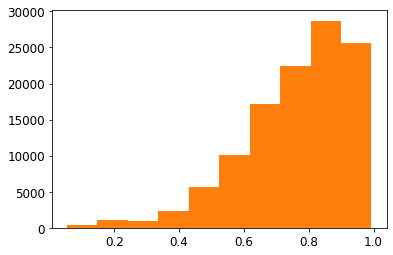

In [22]:
plt.hist(predictions)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
pd.DataFrame(predictions).describe()

,0
count,114393.000000
mean,0.761355
std,0.165061
min,0.054489
25%,0.667193
50%,0.794675
75%,0.890118
max,0.993243


In [24]:
submission = pd.DataFrame({"ID": id_test, "PredictedProb": predictions})
submission.to_csv("submission_v0.1.csv", index=False)